# Reading level metrics

Nov 1, 2018

Calculate Flesch-Kincaid grade level scores per sample in the Brown corpus



In [0]:
import re
from math import sqrt
from collections import defaultdict

import numpy as np
import scipy.optimize as opt


from toolz import concat

import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
% precision 2

import nltk
nltk.download('book', quiet=True)

True

In [0]:
brown = nltk.corpus.brown

Reuse old syllable counting function

In [0]:
cmudict = nltk.corpus.cmudict.dict()

def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]

def syllables(text):
  return sum([w_syllables(w) for w in text if w.isalpha()])

def w_syllables(word):
  word = word.lower()
  if word in cmudict:
    return len(stress(cmudict[word][0]))
  else:
    s = len(re.findall(r'[aeiou]+', word))
    if re.search(r'[aeiou][^aeiou]+e$', word):
      s = s - 1
    return s

Flesch-Kincaid score for a sequence of sentences

$$FK=0.39\times\frac{\text{#words}}{\text{#sents}}+11.8\times\frac{\text{#syllables}}{\text{#words}}-15.59$$

In [0]:
def fk(corpus):
  sents = len(corpus)
  words = len([w for w in concat(corpus) if w.isalpha()])
  sylls = syllables(concat(corpus))
  
  return 0.39*(words/sents) + 11.8*(sylls/words) - 15.59

FK scores per genre:

In [7]:
brown.fileids(categories='humor')

['cr01', 'cr02', 'cr03', 'cr04', 'cr05', 'cr06', 'cr07', 'cr08', 'cr09']

In [8]:
print(f'{"":15} {"FK":>5}')
for cat in brown.categories():
    print(f'{cat:15} {fk(brown.sents(categories=cat)):5.2f}')

                   FK
adventure        4.96
belles_lettres  11.05
editorial        9.92
fiction          5.78
government      12.41
hobbies          9.21
humor            8.37
learned         12.19
lore            10.23
mystery          4.94
news            10.10
religion        10.70
reviews         10.70
romance          5.39
science_fiction  6.33


FK scores per text sample, aggregated by genre:

In [0]:
scores = defaultdict(list)
for cat in brown.categories():
  for f in brown.fileids(categories=cat):
    scores[cat].append(fk(brown.sents(f)))

In [10]:
print(f'{"":15} {"N":>2} {"mean":>5} {"std":>5}')
for cat in sorted(scores):
  print(f'{cat:15} {len(scores[cat]):2} {np.mean(scores[cat]):5.2f} {np.std(scores[cat]):5.2f}')

                 N  mean   std
adventure       29  5.13  1.42
belles_lettres  75 11.42  2.62
editorial       27 10.09  1.77
fiction         29  6.22  2.14
government      30 12.75  1.74
hobbies         36  9.53  2.30
humor            9  8.81  2.69
learned         80 12.48  1.83
lore            48 10.59  2.73
mystery         24  5.02  0.86
news            44 10.20  1.68
religion        17 11.39  3.31
reviews         17 10.80  0.99
romance         29  5.80  1.89
science_fiction  6  6.44  1.77


[Box plot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) showing distribution of FK scores within genres

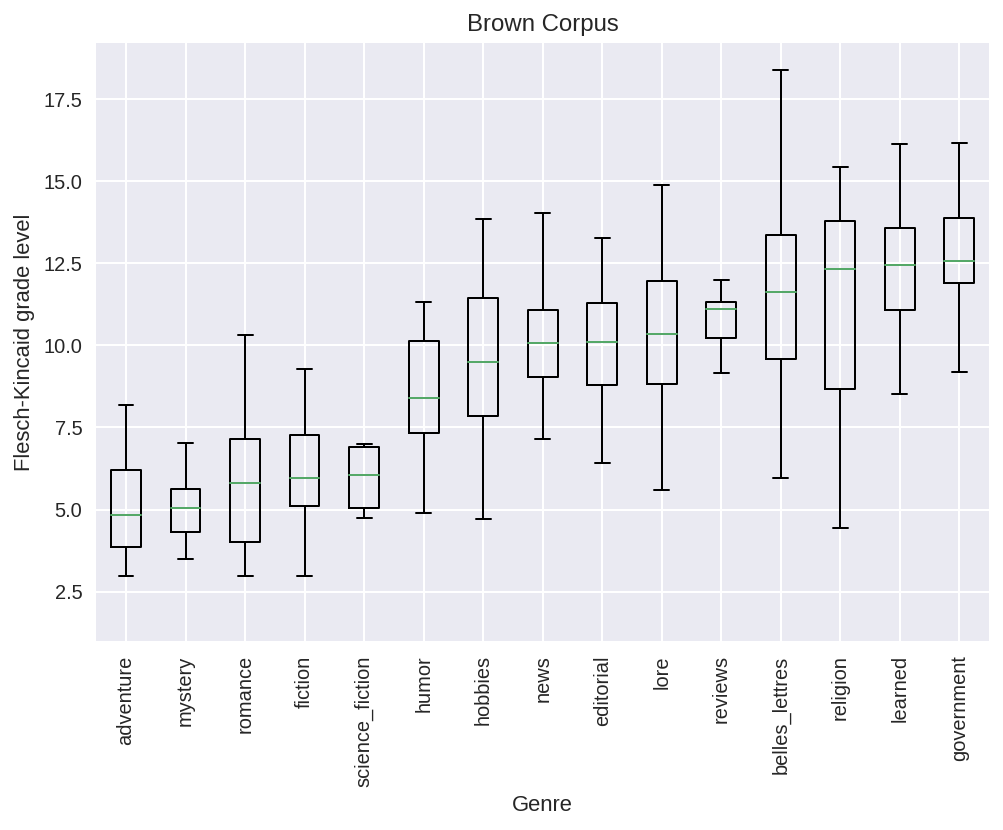

In [11]:
x, y = zip(*sorted(scores.items(), key=lambda item: np.median(item[1])))


plt.boxplot(y, labels=x)
plt.title('Brown Corpus')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Flesch-Kincaid grade level')
plt.show()

Grade level for State of the Union addresses, by year

Text(0.5,1,'State of the Union Addresses')

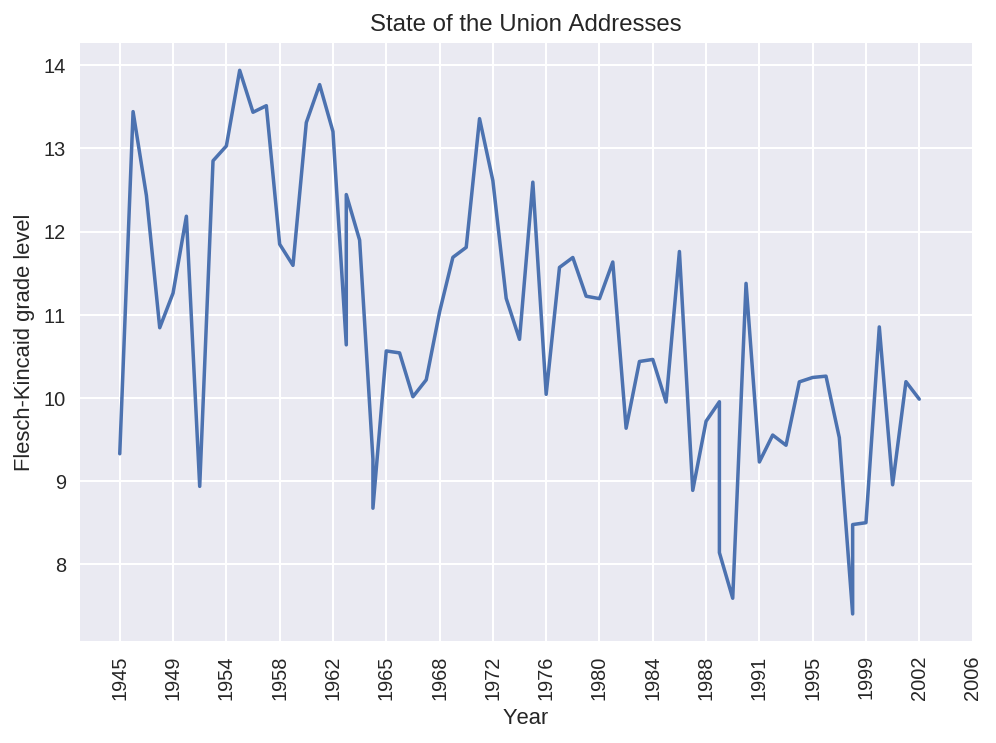

In [12]:
x = [f[0:4] for f in nltk.corpus.state_union.fileids()]
y = [fk(nltk.corpus.state_union.sents(f)) for f in nltk.corpus.state_union.fileids()]
        
  
plt.plot(x, y)
plt.xticks(range(0,len(x),4), x[::4], rotation=90, )   # only label every 4th year
plt.xlabel('Year')
plt.ylabel('Flesch-Kincaid grade level')
plt.title('State of the Union Addresses')

Grade level for inaugural addresses by year

Text(0.5,1,'Inaugural Addresses')

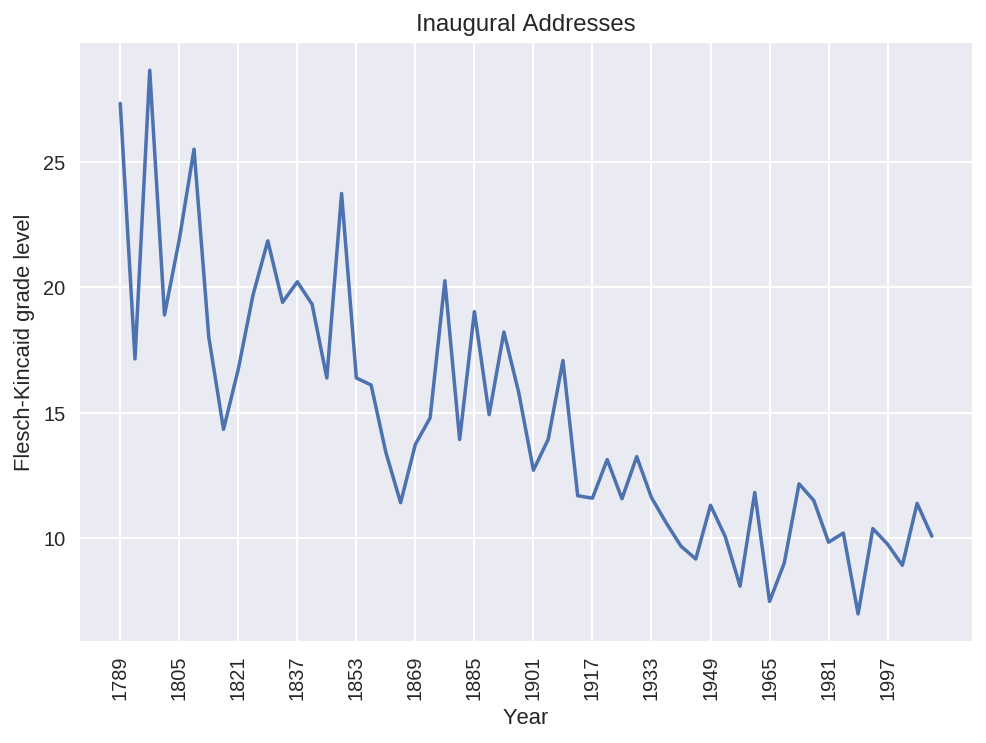

In [13]:
x = [f[0:4] for f in nltk.corpus.inaugural.fileids()]
y = [fk(nltk.corpus.inaugural.sents(f)) for f in nltk.corpus.inaugural.fileids()]

plt.plot(x, y)
plt.xticks(range(0,len(x),4), x[::4], rotation=90)   # only label every 4th year
plt.xlabel('Year')
plt.ylabel('Flesch-Kincaid grade level')
plt.title('Inaugural Addresses')